# Data Visualization for JAMSEC data: 

In [1]:
# Data Explained:
## Each .tsv file is a cruise chopped into 10,000 sequential segments. 

In [2]:
# Check to see how balanced the dataset is: 

In [3]:
# Read in the filename:

import pandas as pd
import re

fpath = 'data/JAMSTEC/JAMSTEC-part00000.tsv'

jamsec = []

with open(fpath) as f:
    Lines = f.readlines()
    for line in Lines: 
        line = line.strip()
        cols = line.split(" ")
        jamsec.append(cols)

    

In [4]:
cols = ["lon", "lat", "depth", "sigh", "sigd", "SID", "pred", "ID", "(pred-depth)/depth", "d10", 'd20', "d60", "age", "VGG", "rate", "sed", "roughness", "G:T", "NDP2.5m", "NDP5m", "NDP10m", "NDP30m", "STD2.5m", "STD5m", "STD10m", "STD30m", "MED2.5", "MED5m", "MED10m", "MED30m", "D-MED2.5m/STD2.5m", "D-MED5m/STD5m", "D-MED10m/STD10m", "D-MED30m/STD30m", "year", "kind"]
jamsec_df = pd.DataFrame(jamsec, columns=cols)


In [5]:
jamsec_df.head()

,lon,lat,depth,sigh,sigd,SID,pred,ID,(pred-depth)/depth,d10,...,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year,kind
0,143.63438,13.69385,-3840,0,9998,732,-3768,1,0.01875,0.841910827448,...,-146.834,-130.151,-239.782,-353.259,-1.32947,-1.10298,-1.71776,-1.48651,2010,M
1,143.63592,13.69378,-3838,0,9998,732,-3778,2,0.0156331,0.851565224962,...,-142.254,-128.33,-239.209,-352.362,-1.29926,-1.09212,-1.70016,-1.48549,2010,M
2,143.72245,13.69383,-3819,0,9998,732,-3789,3,0.00785546,0.97479694406,...,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010,M
3,143.72467,13.69383,-3828,0,9998,732,-3800,4,0.00731452,0.973613649987,...,-47.3266,-217.508,-319.66,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010,M
4,143.73005,13.69397,-3829,0,9998,732,-3819,5,0.00261165,0.970733921364,...,-52.8624,-240.776,-325.912,-391.46,-0.915904,-1.9523,-1.5462,-1.73595,2010,M


In [6]:
len(jamsec_df)

29260

In [7]:
# Count number of good vs. bad cruises, using sigd=9999 for false
jamsec_df.loc[(jamsec_df.sigd != "9999"), 'sigd'] = 1
jamsec_df.loc[(jamsec_df.sigd == "9999"), 'sigd'] = 0

In [8]:
jamsec_df.head(5)

,lon,lat,depth,sigh,sigd,SID,pred,ID,(pred-depth)/depth,d10,...,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year,kind
0,143.63438,13.69385,-3840,0,1,732,-3768,1,0.01875,0.841910827448,...,-146.834,-130.151,-239.782,-353.259,-1.32947,-1.10298,-1.71776,-1.48651,2010,M
1,143.63592,13.69378,-3838,0,1,732,-3778,2,0.0156331,0.851565224962,...,-142.254,-128.33,-239.209,-352.362,-1.29926,-1.09212,-1.70016,-1.48549,2010,M
2,143.72245,13.69383,-3819,0,1,732,-3789,3,0.00785546,0.97479694406,...,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010,M
3,143.72467,13.69383,-3828,0,1,732,-3800,4,0.00731452,0.973613649987,...,-47.3266,-217.508,-319.66,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010,M
4,143.73005,13.69397,-3829,0,1,732,-3819,5,0.00261165,0.970733921364,...,-52.8624,-240.776,-325.912,-391.46,-0.915904,-1.9523,-1.5462,-1.73595,2010,M


In [9]:
# Remove SID since can't be used in predicting feature: 
# Also, remove all non-numeric or irrelvant features: 
jamsec_df = jamsec_df.drop(columns=['SID', 'ID', 'kind'])

In [10]:
print(len(jamsec_df))
jamsec_df.head()

29260


,lon,lat,depth,sigh,sigd,pred,(pred-depth)/depth,d10,d20,d60,...,STD30m,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year
0,143.63438,13.69385,-3840,0,1,-3768,0.01875,0.841910827448,0.859021631073,0.858572668752,...,237.642799735,-146.834,-130.151,-239.782,-353.259,-1.32947,-1.10298,-1.71776,-1.48651,2010
1,143.63592,13.69378,-3838,0,1,-3778,0.0156331,0.851565224962,0.863302224111,0.858939275383,...,237.202723486,-142.254,-128.33,-239.209,-352.362,-1.29926,-1.09212,-1.70016,-1.48549,2010
2,143.72245,13.69383,-3819,0,1,-3789,0.00785546,0.97479694406,0.971159060586,0.897157749411,...,225.281408963,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010
3,143.72467,13.69383,-3828,0,1,-3800,0.00731452,0.973613649987,0.971234864639,0.898352799901,...,225.320110233,-47.3266,-217.508,-319.66,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010
4,143.73005,13.69397,-3829,0,1,-3819,0.00261165,0.970733921364,0.971164644898,0.901053928602,...,225.501848329,-52.8624,-240.776,-325.912,-391.46,-0.915904,-1.9523,-1.5462,-1.73595,2010


In [11]:
# Convert all columns to float: 
new_cols = jamsec_df.columns
for c in new_cols: 
    print(c)
    jamsec_df = jamsec_df[~jamsec_df[c].isin(["NaN"])]
    jamsec_df[c] = pd.to_numeric(jamsec_df[c])

lon
lat
depth
sigh
sigd
pred
(pred-depth)/depth
d10
d20
d60
age
VGG
rate
sed
roughness
G:T
NDP2.5m
NDP5m
NDP10m
NDP30m
STD2.5m
STD5m
STD10m
STD30m
MED2.5
MED5m
MED10m
MED30m
D-MED2.5m/STD2.5m
D-MED5m/STD5m
D-MED10m/STD10m
D-MED30m/STD30m
year


In [12]:
#jamsec_df = jamsec_df.dropna()
print(len(jamsec_df))
jamsec_df.head()

27289


,lon,lat,depth,sigh,sigd,pred,(pred-depth)/depth,d10,d20,d60,...,STD30m,MED2.5,MED5m,MED10m,MED30m,D-MED2.5m/STD2.5m,D-MED5m/STD5m,D-MED10m/STD10m,D-MED30m/STD30m,year
0,143.63438,13.69385,-3840,0,1,-3768,0.018750,0.841911,0.859022,0.858573,...,237.642800,-146.8340,-130.151,-239.782,-353.259,-1.329470,-1.10298,-1.71776,-1.48651,2010
1,143.63592,13.69378,-3838,0,1,-3778,0.015633,0.851565,0.863302,0.858939,...,237.202723,-142.2540,-128.330,-239.209,-352.362,-1.299260,-1.09212,-1.70016,-1.48549,2010
2,143.72245,13.69383,-3819,0,1,-3789,0.007855,0.974797,0.971159,0.897158,...,225.281409,-41.4849,-200.027,-308.482,-379.145,-0.764249,-1.78157,-1.49589,-1.68298,2010
3,143.72467,13.69383,-3828,0,1,-3800,0.007315,0.973614,0.971235,0.898353,...,225.320110,-47.3266,-217.508,-319.660,-388.872,-0.860299,-1.88628,-1.53997,-1.72586,2010
4,143.73005,13.69397,-3829,0,1,-3819,0.002612,0.970734,0.971165,0.901054,...,225.501848,-52.8624,-240.776,-325.912,-391.460,-0.915904,-1.95230,-1.54620,-1.73595,2010


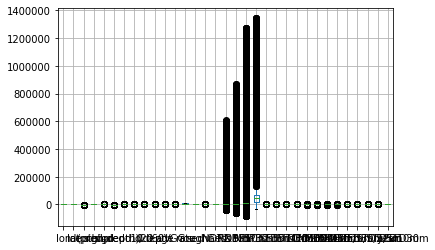

In [16]:
boxplot = jamsec_df.boxplot()

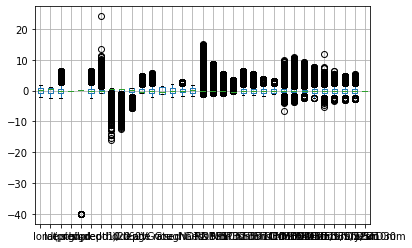

In [14]:
from sklearn.preprocessing import StandardScaler

# standard scaler assumes that data is normally distributed within each column
df_transform = StandardScaler().fit_transform(jamsec_df)
df_transform = pd.DataFrame(df_transform, columns=jamsec_df.columns)


boxplot = df_transform.boxplot()

In [ ]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# histogram plot
pyplot.hist(jamsec_df)
pyplot.show()

## Create processing pipeline:

In [ ]:
def read_tsv_to_df(fpath):
    df = []
    with open(fpath) as f:
        Lines = f.readlines()
        for line in Lines: 
            line = line.strip()
            cols = line.split(" ")
            df.append(cols)
            
    cols = ["lon", "lat", "depth", "sigh", "sigd", "SID", "pred", "ID", "(pred-depth)/depth", "d10", 'd20', "d60", "age", "VGG", "rate", "sed", "roughness", "G:T", "NDP2.5m", "NDP5m", "NDP10m", "NDP30m", "STD2.5m", "STD5m", "STD10m", "STD30m", "MED2.5", "MED5m", "MED10m", "MED30m", "D-MED2.5m/STD2.5m", "D-MED5m/STD5m", "D-MED10m/STD10m", "D-MED30m/STD30m", "year", "kind"]
    df = pd.DataFrame(df, columns=cols)
    
    # Pre-process it into numeric form 
    df = df.drop(columns=['SID', 'ID', 'kind'])

    # Convert all columns to float: 
    new_cols = df.columns
    for c in new_cols: 
        df = df[~df[c].isin(["NaN"])]
        df[c] = pd.to_numeric(df[c])
    
    # standard scaler assumes that data is normally distributed within each column
    # df_transform = StandardScaler().fit_transform(df)
    # df_transform = pd.DataFrame(df_transform, columns=df.columns)

    return df

In [ ]:
fpath = 'data/JAMSTEC/JAMSTEC-part00001.tsv'
jamsec1 = read_tsv_to_df(fpath)

In [ ]:
jamsec1.head()

In [ ]:
print(type(jamsec_df))

In [ ]:
jamsec_lon = jamsec_df[['lon']]
jamsec1_lon = jamsec1[['lon']]

jamsec1_lon.columns = ['long']

print(jamsec1_lon.head())

new_jamsec_lon = pd.concat([jamsec_lon, jamsec1_lon], axis=1).reindex(jamsec_df.index)
new_jamsec_lon.reset_index()

print(new_jamsec_lon.columns)
print(new_jamsec_lon.head())


#col = pd.Index(list(new_jamsec_lon.columns))
#new_jamsec_lon.set_index(col)

bplot = new_jamsec_lon.boxplot()
bplot = new_jamsec_lon.boxplot()


In [ ]:
# Read in all of the JAMSTEC files into a single jamstec df: 
# Read in the filename:
import glob

def read_all_files(all_files):
    count = 0
    total = 500
    li = []
    for filename in all_files:
        count += 1
        print(filename + " " + count + " / " + total)
        with open(filename) as f:
            Lines = f.readlines()
            for line in Lines: 
                line = line.strip()
                cols = line.split(" ")
                li.append(cols)
            
    cols = ["lon", "lat", "depth", "sigh", "sigd", "SID", "pred", "ID", "(pred-depth)/depth", "d10", 'd20', "d60", "age", "VGG", "rate", "sed", "roughness", "G:T", "NDP2.5m", "NDP5m", "NDP10m", "NDP30m", "STD2.5m", "STD5m", "STD10m", "STD30m", "MED2.5", "MED5m", "MED10m", "MED30m", "D-MED2.5m/STD2.5m", "D-MED5m/STD5m", "D-MED10m/STD10m", "D-MED30m/STD30m", "year", "kind"]
    df = pd.DataFrame(li, columns=cols)
    return df

    

In [ ]:
fpath = 'data/JAMSTEC/'
all_files = glob.glob(fpath + "*.tsv")

full_jamstec_df = read_all_files(all_files)


In [3]:
full_jamstec_df.head()

NameError: name 'full_jamstec_df' is not defined